In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
from sklearn import metrics

In [129]:
insurance_data = pd.read_csv('insurance.csv')

In [130]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [131]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [132]:
insurance_data.shape

(1338, 7)

In [133]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [134]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [135]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [136]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [137]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [138]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


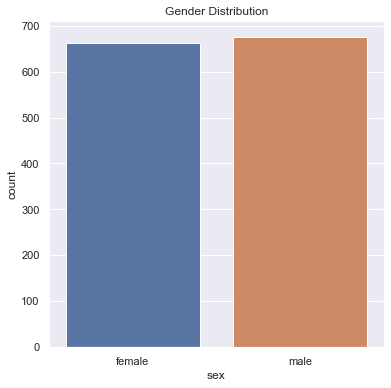

In [139]:
# gender distribution

plt.figure(figsize=(6,6))
sns.countplot(insurance_data['sex'])
plt.title("Gender Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


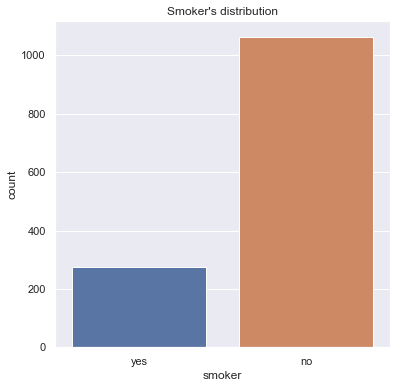

In [140]:
plt.figure(figsize=(6,6))
sns.countplot(insurance_data['smoker'])
plt.title("Smoker's distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


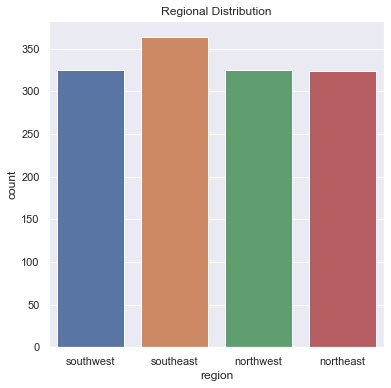

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(insurance_data['region'])
plt.title("Regional Distribution")
plt.show()

# Categorical data
# Sex , smoker ,region

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


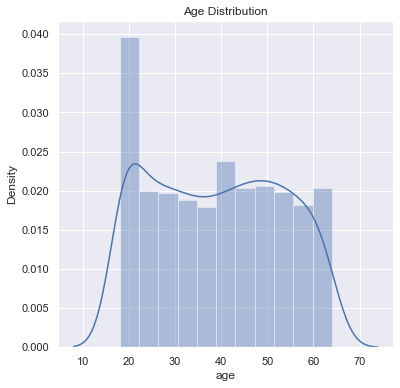

In [142]:
# dsitribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

# Normal BMI range --> 18.5 to 24.9

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


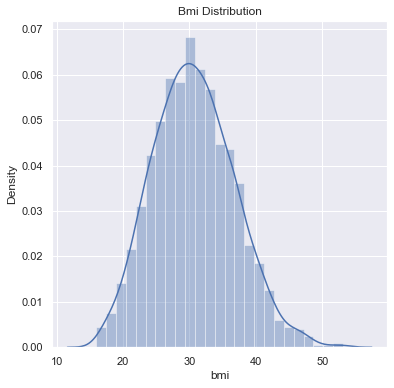

In [143]:
# bmi data

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("Bmi Distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


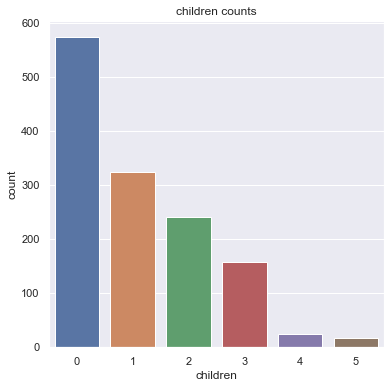

In [144]:
# children data
plt.figure(figsize=(6,6))
sns.countplot(insurance_data['children'])
plt.title('children counts')
plt.show()

In [145]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


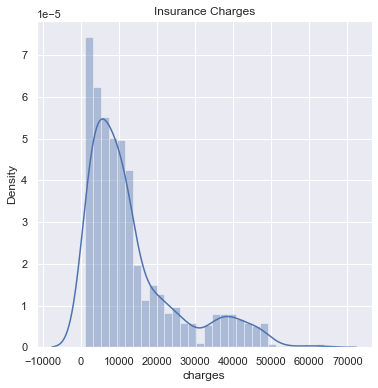

In [146]:
# insurance charges

plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title("Insurance Charges")
plt.show()

# Data PreProcessing

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
encoder = LabelEncoder()

In [149]:
insurance_data['sex'] = encoder.fit_transform(insurance_data['sex'])

In [150]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [151]:
insurance_data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [152]:
insurance_data['smoker'] = encoder.fit_transform(insurance_data['smoker'])

In [153]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [154]:
insurance_data['region'] = encoder.fit_transform(insurance_data['region'])

In [155]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [156]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


# splitting the data

In [157]:
X = insurance_data.drop(columns=['charges'],axis=1)
y = insurance_data['charges']

In [158]:
X.shape

(1338, 6)

In [159]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [160]:
y.shape

(1338,)

In [161]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Train Test Split

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [163]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


# Model training

In [164]:
model = LinearRegression()

In [165]:
model.fit(X_train,y_train)

LinearRegression()

In [166]:
train_predictions = model.predict(X_train)

In [167]:
train_error_score = metrics.r2_score(y_train,train_predictions)

In [168]:
print("r2 score for training data :",train_error_score)

r2 score for training data : 0.7519923667088932


In [169]:
test_predictions = model.predict(X_test)

In [170]:
test_error_score = metrics.r2_score(y_test,test_predictions)

In [171]:
print("r2 score on test data: ",test_error_score)

r2 score on test data:  0.7445422986536503


# Building a Predictive System

In [172]:
input_data = (31,0,25.74,0,0,2)

# convert to numpy array

input_data_array = np.asarray(input_data)

# reshaping the array 

input_data_array_reshaped = input_data_array.reshape(1,-1)

# model prediction

answer=model.predict(input_data_array_reshaped)

print("The insurance cost is USD: ",answer[0])

The insurance cost is USD:  3911.4481614003416
